# **SENTIMENT ANALYSIS ON TIKTOK APP**



TikTok is a popular social media platform for sharing short videos. Developed by the Chinese technology company ByteDance, the app was launched in 2016 and quickly gained worldwide popularity due to its unique and interactive concept.

On TikTok, users can create short videos ranging from 15 seconds to 10 minutes, with a variety of filters, music, and interesting effects. The content varies widely, including dance, comedy, tutorials, product reviews, challenges, and more. TikTok’s sophisticated algorithm is especially popular among users because it displays highly relevant content based on each user’s interests on the *For You* Page (FYP).

Beyond entertainment, TikTok is also frequently used by businesses and individuals for marketing, promotion, and education, making it one of the most influential platforms in the digital world today.

## Library Import 📚

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load Dataset 🦉

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Belajar Pengembangan Machine Learning/NLP Project/tiktok_review_data.csv'

In [ ]:
data = pd.read_csv(data_path)
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d4a3fbf4-efe6-482b-b1e1-3bfbd08a9fee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hai tiktok, aplikasi anda sangat bagus, namun ...",3,0,NaN,2024-05-22 02:01:17,NaN,NaN,NaN
1,1cdd269f-f595-48ad-8908-2fae90cdd039,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak membosankan, video menarik, resolusi video...",5,1579,37.1.4,2024-11-06 08:26:26,NaN,NaN,37.1.4
2,694a792e-122e-4285-b6fe-de58d822d541,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiktok sekarang ga jelas banget baru buka tikt...,1,3334,37.2.5,2024-11-06 02:42:21,NaN,NaN,37.2.5
3,3c9e74dc-a52e-47b1-a495-e98dede4eedb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kadang tiba"" ada tulisan ""anda mengetik terlal...",2,278,37.2.5,2024-11-07 12:26:08,NaN,NaN,37.2.5
4,700f88c1-b404-4e4a-98ec-575ac35c1ac0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong pihak developer tiktok, perbaiki apk in...",1,8958,37.0.4,2024-10-23 02:32:48,NaN,NaN,37.0.4
...,...,...,...,...,...,...,...,...,...,...,...
107995,25ae04f7-9768-4d9b-b47d-bc0c12c1746c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hai nama saya aulia saya waktu mendonwload tik...,5,0,NaN,2020-05-31 03:51:37,NaN,NaN,NaN
107996,9b255fe6-2672-441a-83b0-89a1300d79ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon hapus aplikasi ini dari play store, Atau...",3,1,3.4.4,2018-10-19 09:53:37,NaN,NaN,3.4.4
107997,b4c073ef-ad77-4166-b61b-4947d3c574fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat menghibur di saat hati sedang galau,,, ...",4,15,34.4.4,2024-04-23 01:41:04,NaN,NaN,34.4.4
107998,e8600cad-8fb4-4720-810e-16cc12c83cce,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tiktok klau boleh kasih saran video yg tersimp...,4,0,18.4.6,2021-01-27 02:27:51,NaN,NaN,18.4.6


In [ ]:
# Menampilkan informasi tentang DataFrame app_reviews_df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              108000 non-null  object
 1   userName              108000 non-null  object
 2   userImage             108000 non-null  object
 3   content               108000 non-null  object
 4   score                 108000 non-null  int64 
 5   thumbsUpCount         108000 non-null  int64 
 6   reviewCreatedVersion  79430 non-null   object
 7   at                    108000 non-null  object
 8   replyContent          1263 non-null    object
 9   repliedAt             1263 non-null    object
 10  appVersion            79430 non-null   object
dtypes: int64(2), object(9)
memory usage: 9.1+ MB


## Data Preprocessing 🐦

**Dropping Duplicated Data**

In [ ]:
clean_data = data.drop_duplicates()
clean_data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d4a3fbf4-efe6-482b-b1e1-3bfbd08a9fee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hai tiktok, aplikasi anda sangat bagus, namun ...",3,0,NaN,2024-05-22 02:01:17,NaN,NaN,NaN
1,1cdd269f-f595-48ad-8908-2fae90cdd039,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak membosankan, video menarik, resolusi video...",5,1579,37.1.4,2024-11-06 08:26:26,NaN,NaN,37.1.4
2,694a792e-122e-4285-b6fe-de58d822d541,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiktok sekarang ga jelas banget baru buka tikt...,1,3334,37.2.5,2024-11-06 02:42:21,NaN,NaN,37.2.5
3,3c9e74dc-a52e-47b1-a495-e98dede4eedb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kadang tiba"" ada tulisan ""anda mengetik terlal...",2,278,37.2.5,2024-11-07 12:26:08,NaN,NaN,37.2.5
4,700f88c1-b404-4e4a-98ec-575ac35c1ac0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong pihak developer tiktok, perbaiki apk in...",1,8958,37.0.4,2024-10-23 02:32:48,NaN,NaN,37.0.4
...,...,...,...,...,...,...,...,...,...,...,...
107995,25ae04f7-9768-4d9b-b47d-bc0c12c1746c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hai nama saya aulia saya waktu mendonwload tik...,5,0,NaN,2020-05-31 03:51:37,NaN,NaN,NaN
107996,9b255fe6-2672-441a-83b0-89a1300d79ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon hapus aplikasi ini dari play store, Atau...",3,1,3.4.4,2018-10-19 09:53:37,NaN,NaN,3.4.4
107997,b4c073ef-ad77-4166-b61b-4947d3c574fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat menghibur di saat hati sedang galau,,, ...",4,15,34.4.4,2024-04-23 01:41:04,NaN,NaN,34.4.4
107998,e8600cad-8fb4-4720-810e-16cc12c83cce,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tiktok klau boleh kasih saran video yg tersimp...,4,0,18.4.6,2021-01-27 02:27:51,NaN,NaN,18.4.6


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              108000 non-null  object
 1   userName              108000 non-null  object
 2   userImage             108000 non-null  object
 3   content               108000 non-null  object
 4   score                 108000 non-null  int64 
 5   thumbsUpCount         108000 non-null  int64 
 6   reviewCreatedVersion  79430 non-null   object
 7   at                    108000 non-null  object
 8   replyContent          1263 non-null    object
 9   repliedAt             1263 non-null    object
 10  appVersion            79430 non-null   object
dtypes: int64(2), object(9)
memory usage: 9.1+ MB


**Handling Missing Value**

In [ ]:
clean_data.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,28570
at,0
replyContent,106737
repliedAt,106737


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              108000 non-null  object
 1   userName              108000 non-null  object
 2   userImage             108000 non-null  object
 3   content               108000 non-null  object
 4   score                 108000 non-null  int64 
 5   thumbsUpCount         108000 non-null  int64 
 6   reviewCreatedVersion  79430 non-null   object
 7   at                    108000 non-null  object
 8   replyContent          1263 non-null    object
 9   repliedAt             1263 non-null    object
 10  appVersion            79430 non-null   object
dtypes: int64(2), object(9)
memory usage: 9.1+ MB


In [ ]:
# Fill missing values in the 'review' column with the mode
clean_data['reviewCreatedVersion'] = clean_data['reviewCreatedVersion'].fillna(clean_data['reviewCreatedVersion'].mode()[0])
clean_data['replyContent'] = clean_data['replyContent'].fillna(clean_data['replyContent'].mode()[0])
clean_data['repliedAt'] = clean_data['repliedAt'].fillna(clean_data['repliedAt'].mode()[0])
clean_data['appVersion'] = clean_data['appVersion'].fillna(clean_data['appVersion'].mode()[0])

In [ ]:
clean_data.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


**Text Processing**

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d4a3fbf4-efe6-482b-b1e1-3bfbd08a9fee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hai tiktok, aplikasi anda sangat bagus, namun ...",3,0,36.7.4,2024-05-22 02:01:17,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,36.7.4
1,1cdd269f-f595-48ad-8908-2fae90cdd039,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak membosankan, video menarik, resolusi video...",5,1579,37.1.4,2024-11-06 08:26:26,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.1.4
2,694a792e-122e-4285-b6fe-de58d822d541,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiktok sekarang ga jelas banget baru buka tikt...,1,3334,37.2.5,2024-11-06 02:42:21,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.2.5
3,3c9e74dc-a52e-47b1-a495-e98dede4eedb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kadang tiba"" ada tulisan ""anda mengetik terlal...",2,278,37.2.5,2024-11-07 12:26:08,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.2.5
4,700f88c1-b404-4e4a-98ec-575ac35c1ac0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong pihak developer tiktok, perbaiki apk in...",1,8958,37.0.4,2024-10-23 02:32:48,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.0.4
...,...,...,...,...,...,...,...,...,...,...,...
107995,25ae04f7-9768-4d9b-b47d-bc0c12c1746c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hai nama saya aulia saya waktu mendonwload tik...,5,0,36.7.4,2020-05-31 03:51:37,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,36.7.4
107996,9b255fe6-2672-441a-83b0-89a1300d79ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon hapus aplikasi ini dari play store, Atau...",3,1,3.4.4,2018-10-19 09:53:37,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,3.4.4
107997,b4c073ef-ad77-4166-b61b-4947d3c574fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat menghibur di saat hati sedang galau,,, ...",4,15,34.4.4,2024-04-23 01:41:04,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,34.4.4
107998,e8600cad-8fb4-4720-810e-16cc12c83cce,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tiktok klau boleh kasih saran video yg tersimp...,4,0,18.4.6,2021-01-27 02:27:51,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,18.4.6


In [ ]:
# Cleans the text and stores it in the 'text_clean' column.
clean_data['text_clean'] = clean_data['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_data['text_casefoldingText'] = clean_data['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_data['text_slangwords'] = clean_data['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_data['text_tokenizingText'] = clean_data['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_data['text_stopword'] = clean_data['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_data['text_akhir'] = clean_data['text_stopword'].apply(toSentence)

In [ ]:
# Reuslt :
clean_data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,d4a3fbf4-efe6-482b-b1e1-3bfbd08a9fee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hai tiktok, aplikasi anda sangat bagus, namun ...",3,0,36.7.4,2024-05-22 02:01:17,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,36.7.4,Hai tiktok aplikasi anda sangat bagus namun fi...,hai tiktok aplikasi anda sangat bagus namun fi...,hai tiktok aplikasi anda sangat bagus namun fi...,"[hai, tiktok, aplikasi, anda, sangat, bagus, n...","[hai, tiktok, aplikasi, bagus, fitur, dalamnya...",hai tiktok aplikasi bagus fitur dalamnya pemil...
1,1cdd269f-f595-48ad-8908-2fae90cdd039,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak membosankan, video menarik, resolusi video...",5,1579,37.1.4,2024-11-06 08:26:26,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.1.4,Gak membosankan video menarik resolusi video j...,gak membosankan video menarik resolusi video j...,gak membosankan video menarik resolusi video j...,"[gak, membosankan, video, menarik, resolusi, v...","[membosankan, video, menarik, resolusi, video,...",membosankan video menarik resolusi video jerni...
2,694a792e-122e-4285-b6fe-de58d822d541,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiktok sekarang ga jelas banget baru buka tikt...,1,3334,37.2.5,2024-11-06 02:42:21,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.2.5,tiktok sekarang ga jelas banget baru buka tikt...,tiktok sekarang ga jelas banget baru buka tikt...,tiktok sekarang ga jelas banget baru buka tikt...,"[tiktok, sekarang, ga, jelas, banget, baru, bu...","[tiktok, banget, buka, tiktok, lihat, video, u...",tiktok banget buka tiktok lihat video udh bang...
3,3c9e74dc-a52e-47b1-a495-e98dede4eedb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kadang tiba"" ada tulisan ""anda mengetik terlal...",2,278,37.2.5,2024-11-07 12:26:08,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.2.5,kadang tiba ada tulisan anda mengetik terlalu ...,kadang tiba ada tulisan anda mengetik terlalu ...,kadang tiba ada tulisan anda mengetik terlalu ...,"[kadang, tiba, ada, tulisan, anda, mengetik, t...","[kadang, tulisan, mengetik, cepat, like, video...",kadang tulisan mengetik cepat like video kadan...
4,700f88c1-b404-4e4a-98ec-575ac35c1ac0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong pihak developer tiktok, perbaiki apk in...",1,8958,37.0.4,2024-10-23 02:32:48,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,37.0.4,Tolong pihak developer tiktok perbaiki apk ini...,tolong pihak developer tiktok perbaiki apk ini...,tolong pihak developer tiktok perbaiki apk ini...,"[tolong, pihak, developer, tiktok, perbaiki, a...","[tolong, developer, tiktok, perbaiki, apk, bug...",tolong developer tiktok perbaiki apk bug parah...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,25ae04f7-9768-4d9b-b47d-bc0c12c1746c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hai nama saya aulia saya waktu mendonwload tik...,5,0,36.7.4,2020-05-31 03:51:37,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,36.7.4,Hai nama saya aulia saya waktu mendonwload tik...,hai nama saya aulia saya waktu mendonwload tik...,hai nama saya aulia saya waktu mendonwload tik...,"[hai, nama, saya, aulia, saya, waktu, mendonwl...","[hai, nama, aulia, mendonwload, tik, tok, sena...",hai nama aulia mendonwload tik tok senangkaren...
107996,9b255fe6-2672-441a-83b0-89a1300d79ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon hapus aplikasi ini dari play store, Atau...",3,1,3.4.4,2018-10-19 09:53:37,"Halo, kami minta maaf jika ada kesalahan pada ...",2020-04-07 09:22:56,3.4.4,Mohon hapu

## Labeling 🦩

In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Reads positive lexicon data from GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Send an HTTP request to get a CSV file from GitHub

if response.status_code == 200:
    # If the request is successful
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Read response text as a CSV file using a CSV reader with comma separators

    for row in reader:
        # Loop through each line in a CSV file
        lexicon_positive[row[0]] = int(row[1])
        # Add positive words and their scores to the lexicon_positive dictionary
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Reads negative lexicon data from GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Read response text as a CSV file using a CSV reader with comma separators

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_data['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_data['polarity_score'] = results[0]
clean_data['polarity'] = results[1]
print(clean_data['polarity'].value_counts())

polarity
negative    59531
positive    48469
Name: count, dtype: int64


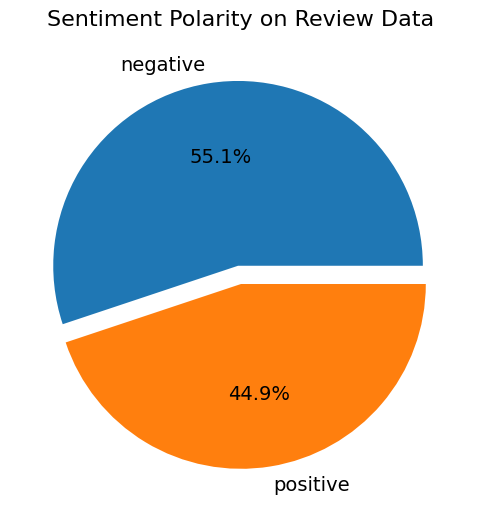

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_data['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_data['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_review' yang hanya berisi review dengan polaritas positif.
positive_review = clean_data[clean_data['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_review'.
positive_review = positive_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_review = positive_review.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_review = positive_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_review.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_review' yang hanya berisi tweet dengan polaritas negatif.
negative_review = clean_data[clean_data['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_review'.
negative_review = negative_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_review' berdasarkan 'polarity_score' secara menaik (ascending).
negative_review = negative_review.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_review = negative_review[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_review = negative_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_review.index += 1

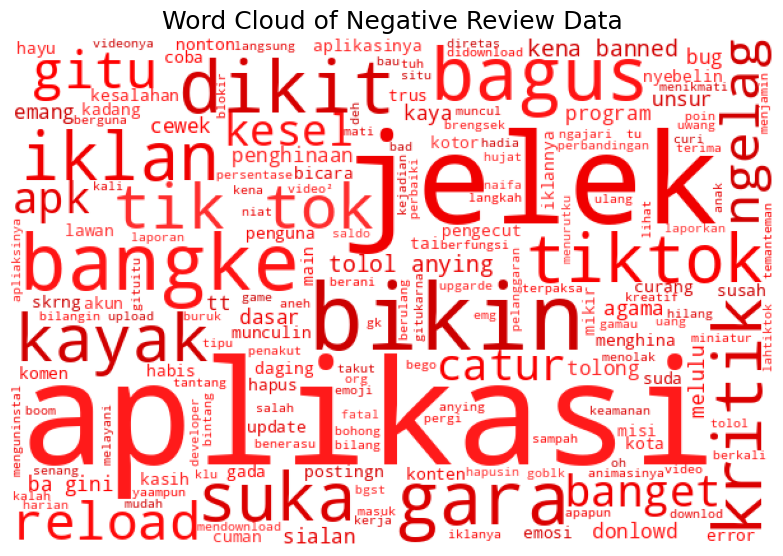

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_review['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Fungsi warna untuk memberi warna merah pada word cloud.
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%, {}%)".format(random.randint(40, 60))  # Red shades with varying lightness

# Membuat objek WordCloud dengan parameter tertentu, menggunakan fungsi warna khusus.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10, color_func=red_color_func).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud)

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()


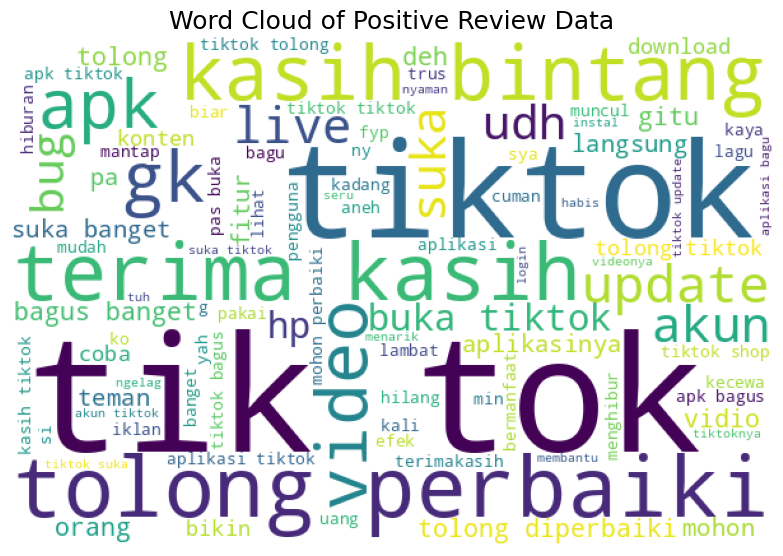

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_review['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

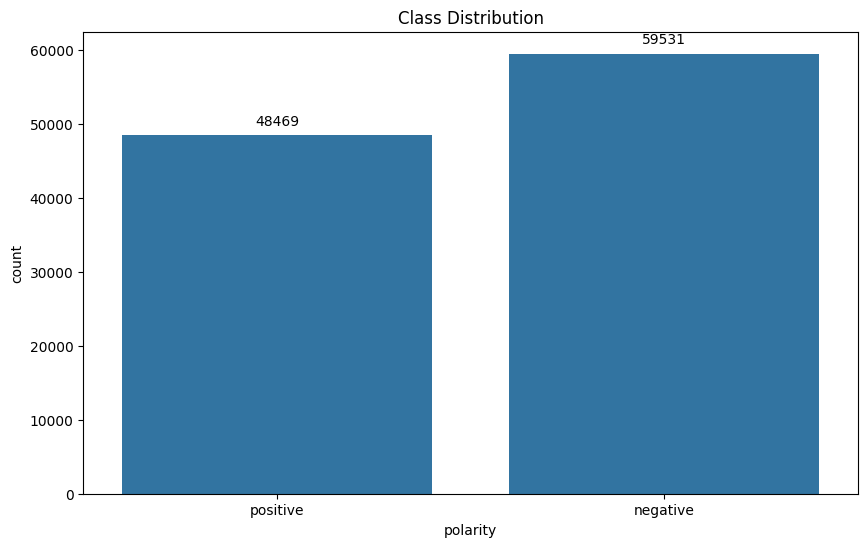

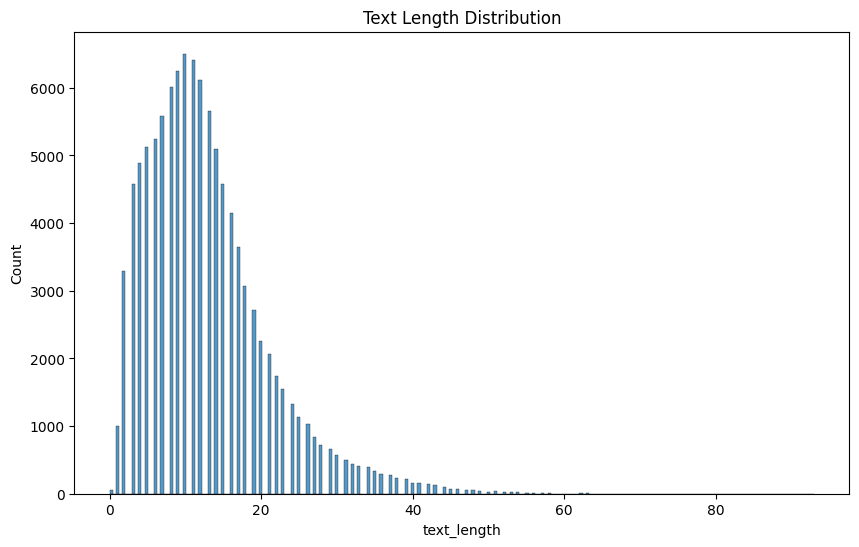

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_data)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_data['text_length'] = clean_data['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_data['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
#plt.figure(figsize=(12, 6))

# Visualize most frequent words
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(clean_data['text_akhir'])
##tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
#tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
#tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
#sns.barplot(x='jumlah', y='index', data=tfidf_df)
#plt.title('Most Frequent Words')
#plt.show()

## Data Splitting 🐈

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
clean_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,d4a3fbf4-efe6-482b-b1e1-3bfbd08a9fee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Hai tiktok, aplikasi anda sangat bagus, namun fitur di dalamnya masih kurang, seperti pemilihan resolusi, pengaturan otomatis resolusi (hemat data) untuk menghemat paket data. Dan tambahlah fitur untuk ""jangan rekomendasikan channel"" supaya pengguna lebih nyaman dengan kontenlainnya. Serta tambahlah fitur ""jangan play video sebelum diputar"" untuk meringankan device yang kurang mumpuni.",3,0,36.7.4,2024-05-22 02:01:17,"Halo, kami minta maaf jika ada kesalahan pada aplikasi ini. Mohon beritahu masalahnya kepada kami di Profil - ••• - Pengaturan - Masukan). Tim pengembangan Tik Tok berjanji akan segera memperbaikinya! Terima kasih.",2020-04-07 09:22:56,36.7.4,Hai tiktok aplikasi anda sangat bagus namun fitur di dalamnya masih kurang seperti pemilihan resolusi pengaturan otomatis resolusi hemat data untuk menghemat paket data Dan tambahlah fitur untuk jangan rekomendasikan channel supaya pengguna lebih nyaman dengan kontenlainnya Serta tambahlah fitur jangan play video sebelum diputar untuk meringankan device yang kurang mumpuni,hai tiktok aplikasi anda sangat bagus namun fitur di dalamnya masih kurang seperti pemilihan resolusi pengaturan otomatis resolusi hemat data untuk menghemat paket data dan tambahlah fitur untuk jangan rekomendasikan channel supaya pengguna lebih nyaman dengan kontenlainnya serta tambahlah fitur jangan play video sebelum diputar untuk meringankan device yang kurang mumpuni,hai tiktok aplikasi anda sangat bagus namun fitur di dalamnya masih kurang seperti pemilihan resolusi pengaturan otomatis resolusi hemat data untuk menghemat paket data dan tambahlah fitur untuk jangan rekomendasikan channel supaya pengguna lebih nyaman dengan kontenlainnya serta tambahlah fitur jangan play video sebelum diputar untuk meringankan device yang kurang mumpuni,"[hai, tiktok, aplikasi, anda, sangat, bagus, namun, fitur, di, dalamnya, masih, kurang, seperti, pemilihan, resolusi, pengaturan, otomatis, resolusi, hemat, data, untuk, menghemat, paket, data, dan, tambahlah, fitur, untuk, jangan, rekomendasikan, channel, supaya, pengguna, lebih, nyaman, dengan, kontenlainnya, serta, tambahlah, fitur, jangan, play, video, sebelum, diputar, untuk, meringankan, device, yang, kurang, mumpuni]","[hai, tiktok, aplikasi, bagus, fitur, dalamnya, pemilihan, resolusi, pengaturan, otomatis, resolusi, hemat, data, menghemat, paket, data, tambahlah, fitur, rekomendasikan, channel, pengguna, nyaman, kontenlainnya, tambahlah, fitur, play, video, diputar, meringankan, device, mumpuni]",hai tiktok aplikasi bagus fitur dalamnya pemilihan resolusi pengaturan otomatis resolusi hemat data menghemat paket data tambahlah fitur rekomendasikan channel pengguna nyaman kontenlainnya tambahlah fitur play video diputar meringankan device mumpuni,11,positive,31
1,1cdd269f-f595-48ad-8908-2fae90cdd039,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Gak membosankan, video menarik, resolusi video jernih, pokoknya enak di tonton. [7N85 2888 3086] jangan dilewatakan kawan tuk mngisi udgankodeku ini pas pertama kali kamu mmkai apps ini, aplikasi ini salah satu aplikasi lama yang masih exis sampai saat ini, saya paling suka dengan menu menu yang di hadirkan pada versi ini karna semuanya lebih teratur jadi pengguna cepat mengerti dan lebih memahami fitur firur mana yang hendak di gunakan, cuman tambahan buatlah even kembali seprti dulu",5,1579,37.1.4,2024-11-06 08:26:26,"Halo, kami minta maaf jika ada kesalahan pada aplikasi ini. Mohon beritahu masalahnya kepada kam

In [ ]:
# Pisahkan data menjadi fitur (review) dan label (sentimen)
X = clean_data['text_akhir']
y = clean_data['polarity']

## Feature Extraction ☝

In [ ]:
X

,text_akhir
0,hai tiktok aplikasi bagus fitur dalamnya pemilihan resolusi pengaturan otomatis resolusi hemat data menghemat paket data tambahlah fitur rekomendasikan channel pengguna nyaman kontenlainnya tambahlah fitur play video diputar meringankan device mumpuni
1,membosankan video menarik resolusi video jernih pokoknya enak tonton dilewatakan kawan tuk mngisi udgankodeku pas kali mmkai apps aplikasi salah aplikasi exis suka menu menu hadirkan versi teratur pengguna cepat mengerti memahami fitur firur cuman tambahan buatlah even seprti
2,tiktok banget buka tiktok lihat video udh banget pas buka tiktoknya banget berulang kali update tiktok bug udh perbaiki tetep berubah tolong perbaiki
3,kadang tulisan mengetik cepat like video kadang bikin kesel cari solusi tetep download tulisan kaya gini kadang siang kadang sore kadang malam bikin bosen like video suka hdah follow orang
4,tolong developer tiktok perbaiki apk bug parah aplikasi temui bug pengguna android bolak menginstal ulang apk uninstal android lag parah hang mencoba membuka apk tiktok stuck logo tiktok mohon update kedepannya memperhatikan kompatibilitas versi android spesifikasi terimakasih
...,...
107995,hai nama aulia mendonwload tik tok senangkarena tik tok ngelike donwload tik tok senang hati menerima tik tok webb usul segini beli gadjet mereknya samsung galaxi kamera gaeessss
107996,mohon hapus aplikasi play store google hapus semoga bikin aplikasi tiktok musically like lain-lain mati rusak dunia kelebayannya aplikasi
107997,menghibur hati galau efek kamera buruk cantik
107998,tiktok klau kasih saran video tersimpan tlong ksh file gtu cri video contoh video msak gk ketumpuk video enak sinpannya videonya ksh nama gk susah cri bwah


In [ ]:
y

,polarity
0,positive
1,positive
2,positive
3,positive
4,negative
...,...
107995,positive
107996,negative
107997,negative
107998,negative


**Bag of Word**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
X_bow = vectorizer.fit_transform(X)
X_bow.toarray()
features = vectorizer.get_feature_names_out()
print("Matriks BoW:")
print(X_bow.toarray())

print("\nDaftar Fitur:")
print(features)

Matriks BoW:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Daftar Fitur:
['aa' 'aaa' 'aaaa' ... '𝟕𝐚𝐩𝐥𝐢𝐤𝐚𝐬𝐢' '𝟭𝟮' '𝟷𝟾']


**TF-IDF**

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, min_df=0.001, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
# Menampilkan hasil ekstraksi fitur
features_df

,adain,adakan,adik,adil,admin,aduh,affiliate,agama,ah,ai,...,wifi,wow,yaaa,yah,yahh,yh,yng,youtube,yuk,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Word2Vec**

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenized_data = [word_tokenize(sentence.lower()) for sentence in X]
model_word2vec = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = model_word2vec.wv

In [ ]:
def sentence_to_vector(sentence):
    words = word_tokenize(sentence.lower())
    vectors = [model_word2vec.wv[word] for word in words if word in model_word2vec.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model_word2vec.vector_size)

In [ ]:
X_word2vec = [sentence_to_vector(sentence) for sentence in X]
X_word2vec = np.array(X_word2vec)

In [ ]:
X_word2vec

array([[-0.04577984,  0.1565243 ,  0.45206067, ..., -0.32355681,
         0.55229735,  0.174872  ],
       [ 0.11521744,  0.16568696,  0.15507632, ..., -0.52527297,
         0.4544549 , -0.0943575 ],
       [ 0.18084982,  0.63041216, -0.01953998, ...,  0.41695741,
         0.33033839, -0.11316533],
       ...,
       [ 0.21039608,  0.60580367,  0.00704591, ..., -0.91282928,
         0.78948694,  0.07298284],
       [ 0.33575645,  0.27131   ,  0.37017787, ..., -0.19742396,
         0.52661204, -0.19319785],
       [-0.01026422,  0.26373345,  0.03067001, ..., -0.39575306,
         0.38251126, -0.12091286]])

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Modeling 💃 🕺

### DEEP LEARNING


**Model Architecture : Base Model Multilayer Perceptron**


Test Accuracy: 0.9323

Final Training Accuracy: 0.9502

Final Test Accuracy: 0.9317



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2674/2700 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 1.1968
Epoch 1: val_accuracy improved from -inf to 0.91032, saving model to best_model.keras
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7091 - loss: 1.1910 - val_accuracy: 0.9103 - val_loss: 0.2880 - learning_rate: 0.0010
Epoch 2/100
2695/2700 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8970 - loss: 0.3121
Epoch 2: val_accuracy improved from 0.91032 to 0.92269, saving model to best_model.keras
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8970 - loss: 0.3121 - val_accuracy: 0.9227 - val_loss: 0.2456 - learning_rate: 0.0010
Epoch 3/100
2679/2700 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.2823
Epoch 3: val_accuracy improved from 0.92269 to 0.92444, saving model to best_model.keras
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9112 - loss: 0.2823 - val_accuracy: 0.9244 - val_loss: 0.2419 - learning_rate: 0.0010
Epoch 4/100
2687/2700 ━━━━━━━━━━━━━━━━━

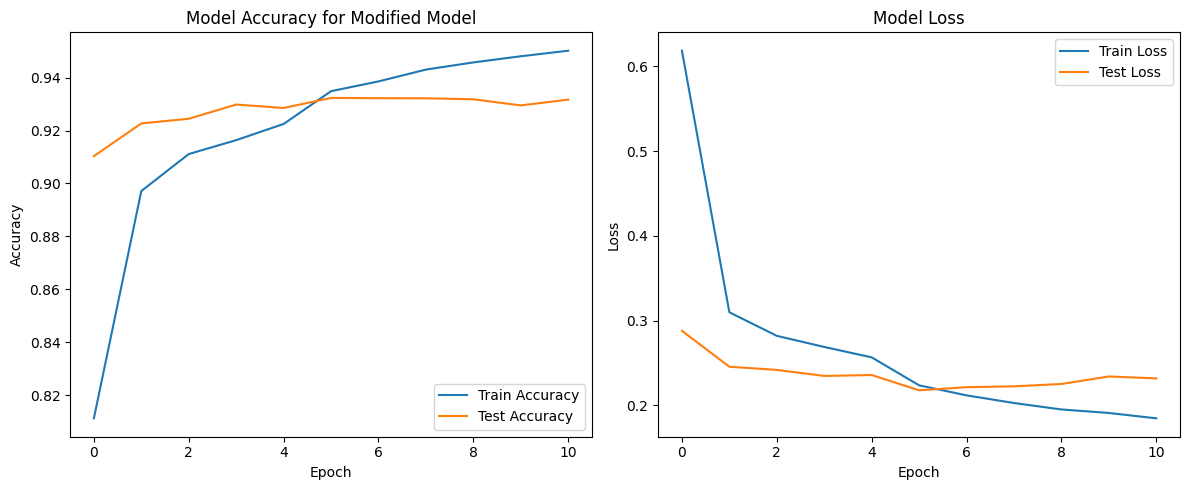

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Train-test split using TFIDF features
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train = X_train.toarray()  # Convert to array if needed
X_test = X_test.toarray()

# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_accuracy',
                               mode='max',
                               patience=5,
                               restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

# Learning rate scheduler function
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    else:
        return 0.0005

lr_scheduler = LearningRateScheduler(lr_schedule)

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Reduced size
    Dropout(0.6),

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Increased L2 regularization
    Dropout(0.6),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with callbacks and learning rate scheduler
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler, checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Print final training and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {val_accuracy:.4f}")

# Plot training & validation accuracy and loss values over epochs
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy for Modified Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

=====================================================

**Model Architecture : LSTM**

=====================================================

Test Accuracy: 0.9329

Final Training Accuracy: 0.9327

Final Test Accuracy: 0.9315


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7669 - loss: 0.4511 - val_accuracy: 0.9223 - val_loss: 0.2203
Epoch 2/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9029 - loss: 0.2563 - val_accuracy: 0.9281 - val_loss: 0.2087
Epoch 3/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9142 - loss: 0.2321 - val_accuracy: 0.9281 - val_loss: 0.2046
Epoch 4/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9165 - loss: 0.2276 - val_accuracy: 0.9326 - val_loss: 0.2025
Epoch 5/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9192 - loss: 0.2180 - val_accuracy: 0.9313 - val_loss: 0.2011
Epoch 6/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9240 - loss: 0.2096 - val_accuracy: 0.9329 - val_loss: 0.2003
Epoch 7/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9256 - loss: 0.2076 - val_accuracy: 0.9315 - val_loss: 0.2026
Epoch 8/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9274 -

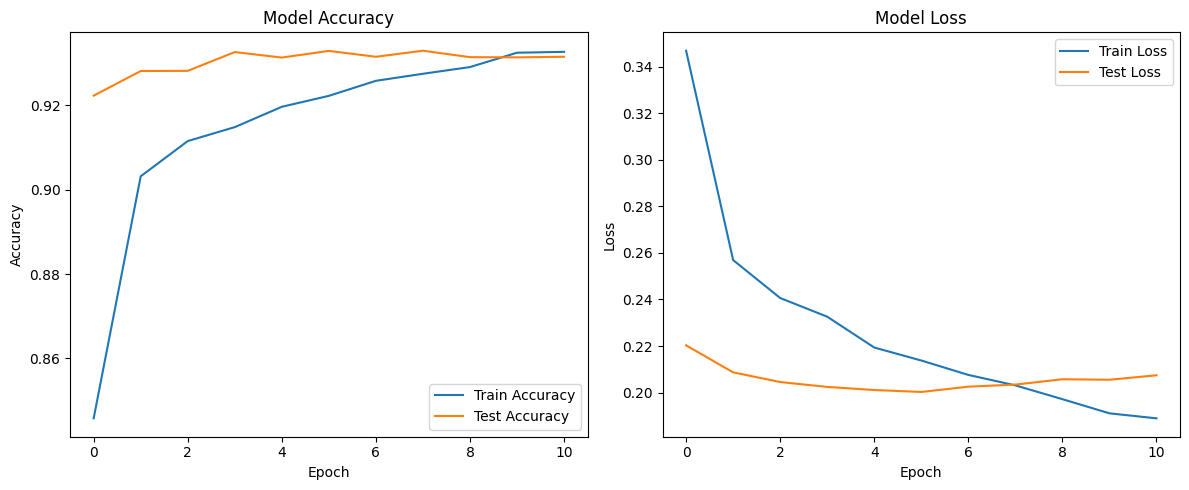

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.5),
    BatchNormalization(),
    LSTM(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Print final training and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {val_accuracy:.4f}")

# Plot training & validation accuracy and loss values over epochs
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(C=10, penalty='l2', solver='liblinear', max_iter=1000)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9386805555555555
Logistic Regression - accuracy_test: 0.9342592592592592
